In [220]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import time
import datetime
import glob
import matplotlib.patches as mpatches



In [221]:
#this assumes only 1 ina file and 1 selenium file in directory!!!
testDirectoryName = "smallimageVSlargeimage_pingpongtest_August24/" #must end with a /
testDirectoryPath = "C:/Users/Alex/Documents/solarserver/aggregator/" + testDirectoryName
fileList = glob.glob(testDirectoryPath  + "*.csv")

print(testDirectoryPath)
fileList

C:/Users/Alex/Documents/solarserver/aggregator/smallimageVSlargeimage_pingpongtest_August24/


['C:/Users/Alex/Documents/solarserver/aggregator/smallimageVSlargeimage_pingpongtest_August24\\ina219-2019-08-24-1566676617.csv.csv',
 'C:/Users/Alex/Documents/solarserver/aggregator/smallimageVSlargeimage_pingpongtest_August24\\selenium-2019-08-24-1566676620.csv.csv']

In [222]:
inaFileName = [k for k in fileList if 'ina' in k]

inaFileName[0]

'C:/Users/Alex/Documents/solarserver/aggregator/smallimageVSlargeimage_pingpongtest_August24\\ina219-2019-08-24-1566676617.csv.csv'

In [223]:
selFileName = [k for k in fileList if 'selenium' in k]

selFileName[0]

'C:/Users/Alex/Documents/solarserver/aggregator/smallimageVSlargeimage_pingpongtest_August24\\selenium-2019-08-24-1566676620.csv.csv'

In [224]:
#For CSV files
inaData = pd.read_csv(inaFileName[0]).fillna(0)

In [225]:
print(inaData.shape)
inaData.head()

(10045, 3)


,mA,V,time
0,502.3,4.54,1.566677e+09
1,499.4,4.54,1.566677e+09
2,499.9,4.54,1.566677e+09
3,497.1,4.54,1.566677e+09
4,499.7,4.54,1.566677e+09


In [226]:
#add power
type(inaData)

pandas.core.frame.DataFrame

In [227]:
inaData.insert(2, 'watts', (inaData.mA / 1000.0) * inaData.V, True)

In [228]:
inaData.head()

,mA,V,watts,time
0,502.3,4.54,2.280442,1.566677e+09
1,499.4,4.54,2.267276,1.566677e+09
2,499.9,4.54,2.269546,1.566677e+09
3,497.1,4.54,2.256834,1.566677e+09
4,499.7,4.54,2.268638,1.566677e+09


In [229]:
#averages per second

inaLength = inaData.shape[0]
inaStartTime = inaData.time[0]
inaEndTime = inaData.time[inaData.shape[0]-1]
inaTimePeriod = inaEndTime - inaStartTime
dataPerSecond =inaLength/inaTimePeriod

dataPerSecond


15.221623283427824

In [230]:
averagedINA = pd.DataFrame(columns=['mA','V','watts','time'])

for av in list(range(int(inaTimePeriod))):
    avmA= inaData.loc[(15*av):((15*av)+14)]['mA'].sum()/15
    avV = inaData.loc[(15*av):((15*av)+14)]['V'].sum()/15
    avWatts = inaData.loc[(15*av):((15*av)+14)]['watts'].sum()/15
    avTime = inaData.loc[(15*av):(15*av)]['time'][inaData.loc[(15*av):(15*av)]['time'].index[0]]
    averagedINA = averagedINA.append({'mA' : avmA , 'V' : avV, 'watts': avWatts,'time': avTime},ignore_index=True)

    

In [231]:
print(averagedINA.shape)
print(averagedINA.head())

(659, 4)
           mA     V     watts          time
0  499.220000  4.54  2.266459  1.566677e+09
1  498.986667  4.54  2.265399  1.566677e+09
2  499.300000  4.54  2.266822  1.566677e+09
3  499.186667  4.54  2.266307  1.566677e+09
4  498.960000  4.54  2.265278  1.566677e+09


In [232]:
seleniumData = pd.read_csv(selFileName[0]).fillna(0)


In [233]:
print(seleniumData.shape)
seleniumData.head()

(240, 2)


,task,time
0,start v1 0,1.566677e+09
1,click,1.566677e+09
2,click,1.566677e+09
3,click,1.566677e+09
4,click,1.566677e+09


In [234]:
seleniumData.task.loc[0]

'start v1 0'

In [235]:
# get start and stop times

testTimes = []

currentRound = 0
for getT in list(range(seleniumData.shape[0])):
    
    if 'start' in seleniumData.task.loc[getT]:
        roundTimes = [seleniumData.time.loc[getT]]
    elif 'stop' in seleniumData.task.loc[getT]:
        roundTimes.append(seleniumData.time.loc[getT])
        testTimes.append(roundTimes)
        
testTimes

[[1566676710.744, 1566676744.658],
 [1566676774.66, 1566676808.775],
 [1566676838.7770002, 1566676870.189],
 [1566676900.191, 1566676931.643],
 [1566676961.6460001, 1566676992.1239998],
 [1566677022.1260002, 1566677053.139],
 [1566677083.141, 1566677113.5110002],
 [1566677143.5129998, 1566677174.371]]

In [236]:
#make new data frames with power date from only test durations

dataFrameSplits = []

for splitTests in list(range(len(testTimes))):
    dataFrameSplits.append(averagedINA.loc[(averagedINA.loc[:,'time']>=(testTimes[splitTests][0])) & (averagedINA.loc[:,'time']<=testTimes[splitTests][1])])


print(len(dataFrameSplits))

#dataFrameSplits[2]

8


In [237]:
#get the max and mins for each test set

for mX in list(range(len(dataFrameSplits))):
    print('------'+str(mX)+'------')
    print ('Max:')
    print (np.max(dataFrameSplits[mX].watts))
    print ('Min:')
    print (np.min(dataFrameSplits[mX].watts))
            

------0------
Max:
2.6139504000000002
Min:
2.259225066666667
------1------
Max:
2.294001466666667
Min:
2.2605265333333335
------2------
Max:
2.596789200000001
Min:
2.259406666666666
------3------
Max:
2.293759333333334
Min:
2.2618885333333334
------4------
Max:
2.5888593333333336
Min:
2.260042266666667
------5------
Max:
2.2986020000000003
Min:
2.263946666666667
------6------
Max:
2.6099552000000004
Min:
2.2630084
------7------
Max:
2.2974821333333337
Min:
2.264037466666667


In [238]:
#obviously this isn't automated...

#large average peak
lPeakAVG =(2.6139504000000002 + 2.596789200000001 + 2.5888593333333336 + 2.6099552000000004) * 0.25

#small overall peak
sPeakAVG =(2.294001466666667+2.293759333333334+2.2986020000000003+2.2974821333333337)* 0.25

print("Large Peak AVG: " + str(lPeakAVG))
print("Small Peak AVG: " + str(sPeakAVG))

#peak differences
print("AVG Peak Difference: " + str(lPeakAVG-sPeakAVG))

Large Peak AVG: 2.602388533333334
Small Peak AVG: 2.2959612333333337
AVG Peak Difference: 0.3064273000000002


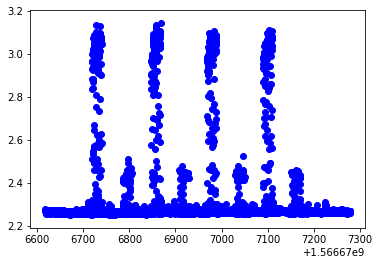

In [239]:

#graph ina219 all data
plt.scatter(x=inaData.loc[:,'time'], y=inaData.loc[:,'watts'], color='b')


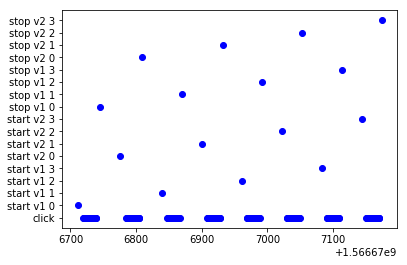

In [240]:
# graph all selenium data
plt.scatter(x=seleniumData.loc[:,'time'], y=seleniumData.loc[:,'task'], color='b')

C:/Users/Alex/Documents/solarserver/aggregator/smallimageVSlargeimage_pingpongtest_August24/voltage_2020-01-14-1578979185.png


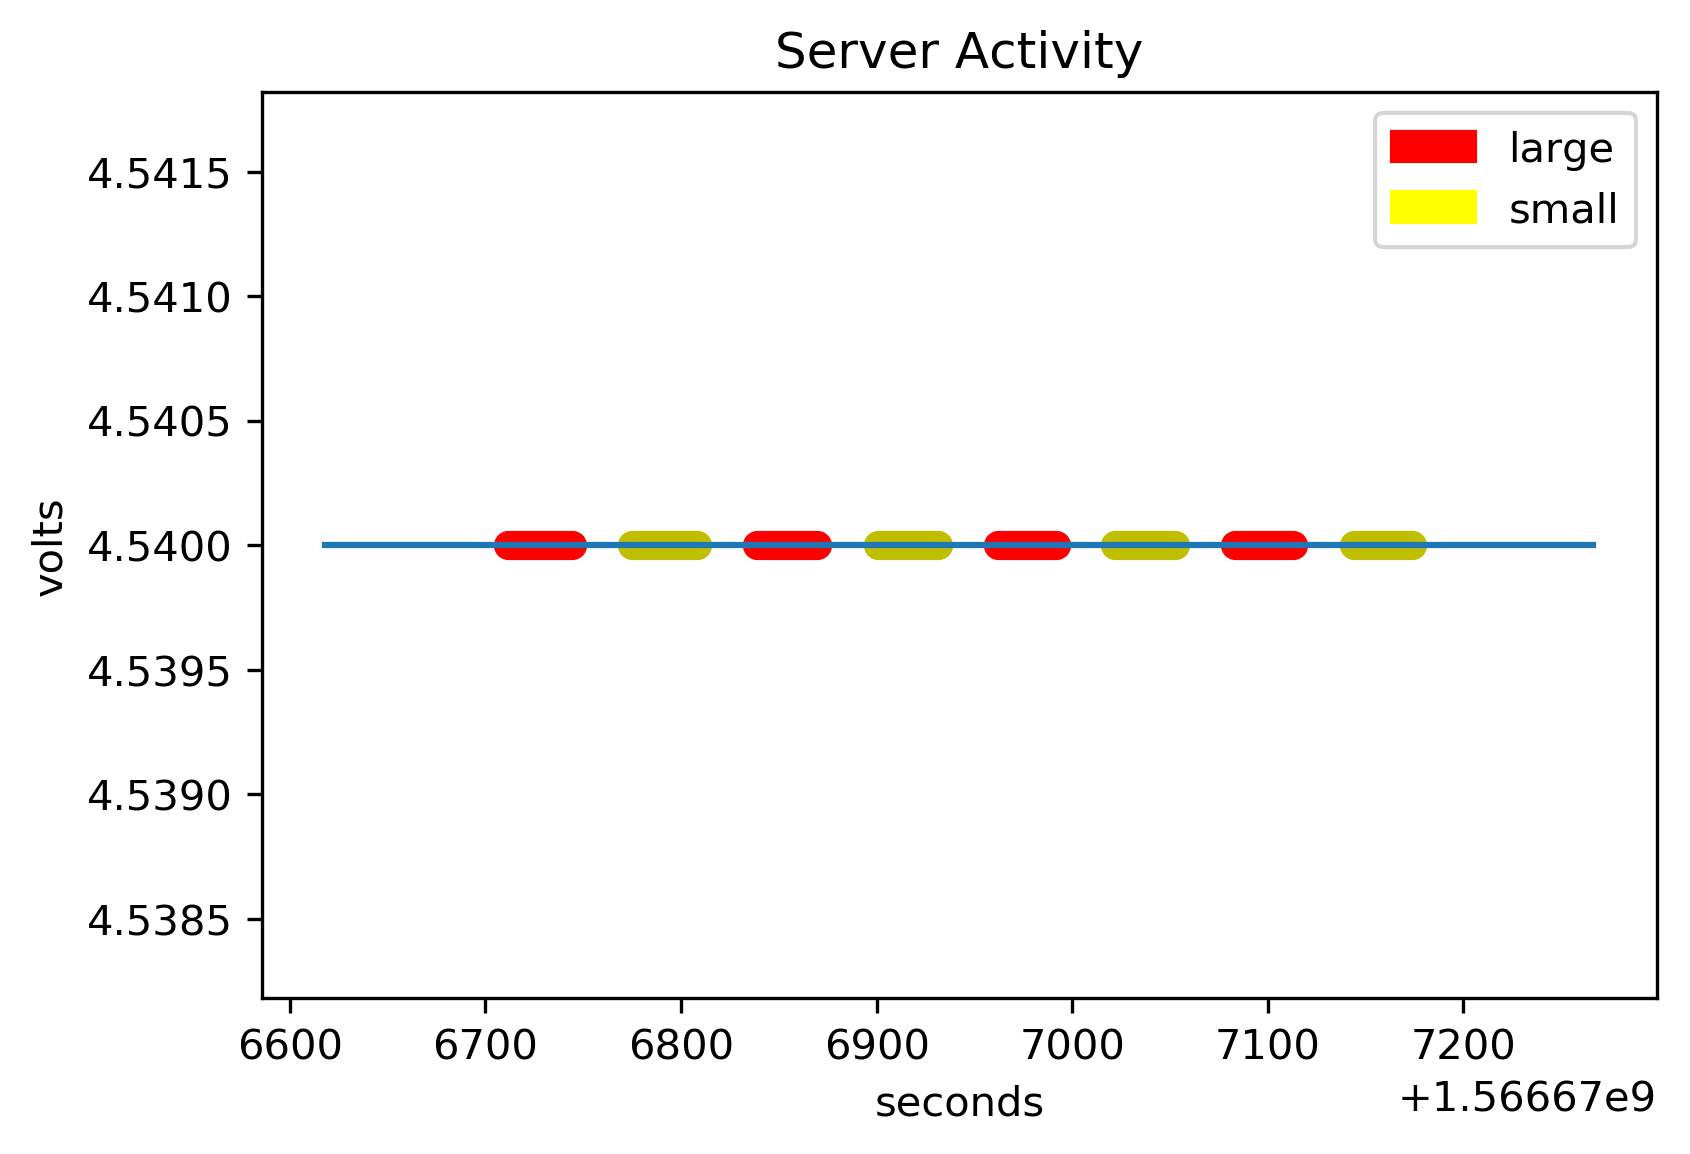

In [241]:
fig, ax = plt.subplots(dpi=300)

x = averagedINA.loc[:,'time']
y = averagedINA.loc[:,'V']
ax.plot(x,y)

ax.set(xlabel='seconds', ylabel='volts',
       title='Server Activity')

colors = ['r','y','b','g']
for plotNum in list(range(len(dataFrameSplits))):
    ax.scatter(x=dataFrameSplits[plotNum].loc[:,'time'], y=dataFrameSplits[plotNum].loc[:,'V'], color=colors[plotNum%2])

redLabel = mpatches.Patch(color='red', label='large')
blueLabel = mpatches.Patch(color='blue', label='small')
yellowLabel = mpatches.Patch(color='yellow', label='small')
greenLabel = mpatches.Patch(color='green', label='small image')


plt.legend(handles=[redLabel, yellowLabel])

#ax.grid()
pngName1 = testDirectoryPath +"voltage_"+str(datetime.date.today())+"-"+str(int(time.time()))+".png"
print(pngName1)
fig.savefig(pngName1)
plt.show()

C:/Users/Alex/Documents/solarserver/aggregator/smallimageVSlargeimage_pingpongtest_August24/current_2020-01-14-1578979186.png


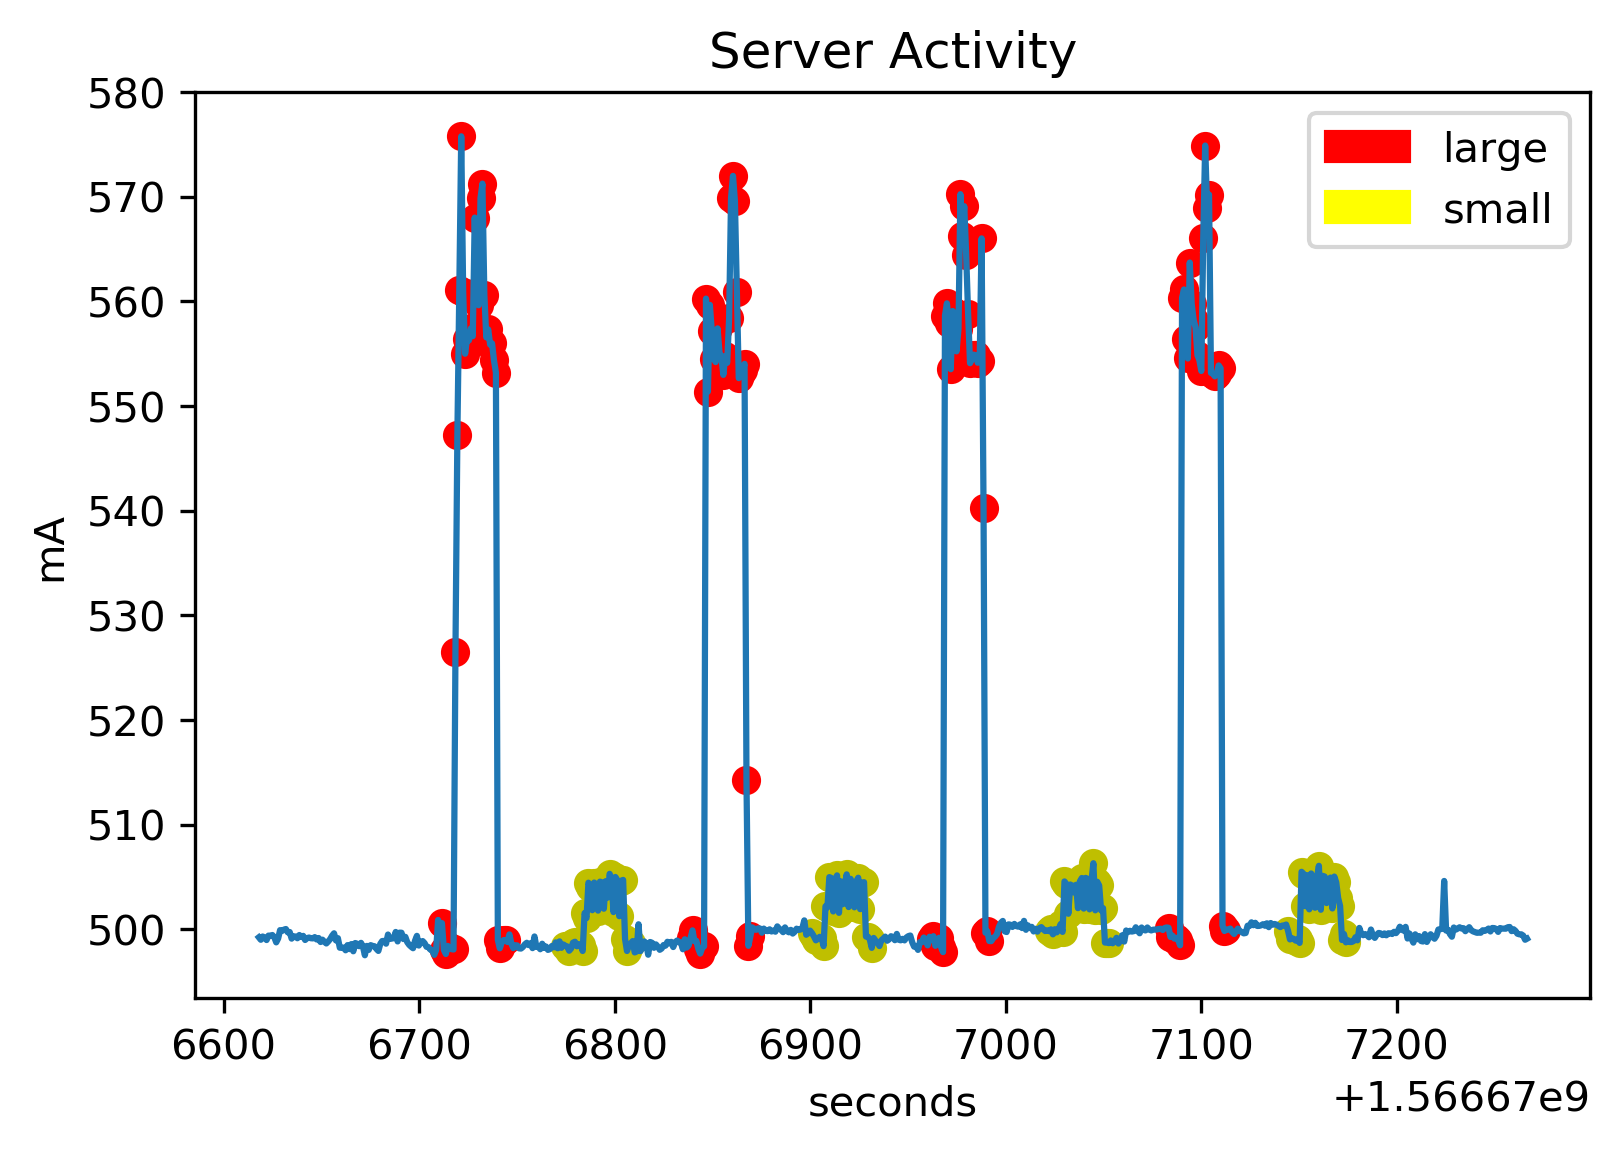

In [242]:
fig, ax = plt.subplots(dpi=300)

x = averagedINA.loc[:,'time']
y = averagedINA.loc[:,'mA']
ax.plot(x,y)

ax.set(xlabel='seconds', ylabel='mA',
       title='Server Activity')

colors = ['r','y','b','g']
for plotNum in list(range(len(dataFrameSplits))):
    ax.scatter(x=dataFrameSplits[plotNum].loc[:,'time'], y=dataFrameSplits[plotNum].loc[:,'mA'], color=colors[plotNum%2])

redLabel = mpatches.Patch(color='red', label='large')
blueLabel = mpatches.Patch(color='blue', label='large image')
yellowLabel = mpatches.Patch(color='yellow', label='small')
greenLabel = mpatches.Patch(color='green', label='small image')

plt.legend(handles=[redLabel, yellowLabel])

#ax.grid()
pngName1 = testDirectoryPath +"current_"+str(datetime.date.today())+"-"+str(int(time.time()))+".png"
print(pngName1)
fig.savefig(pngName1)
plt.show()

C:/Users/Alex/Documents/solarserver/aggregator/smallimageVSlargeimage_pingpongtest_August24/watts_2020-01-14-1578979187.png


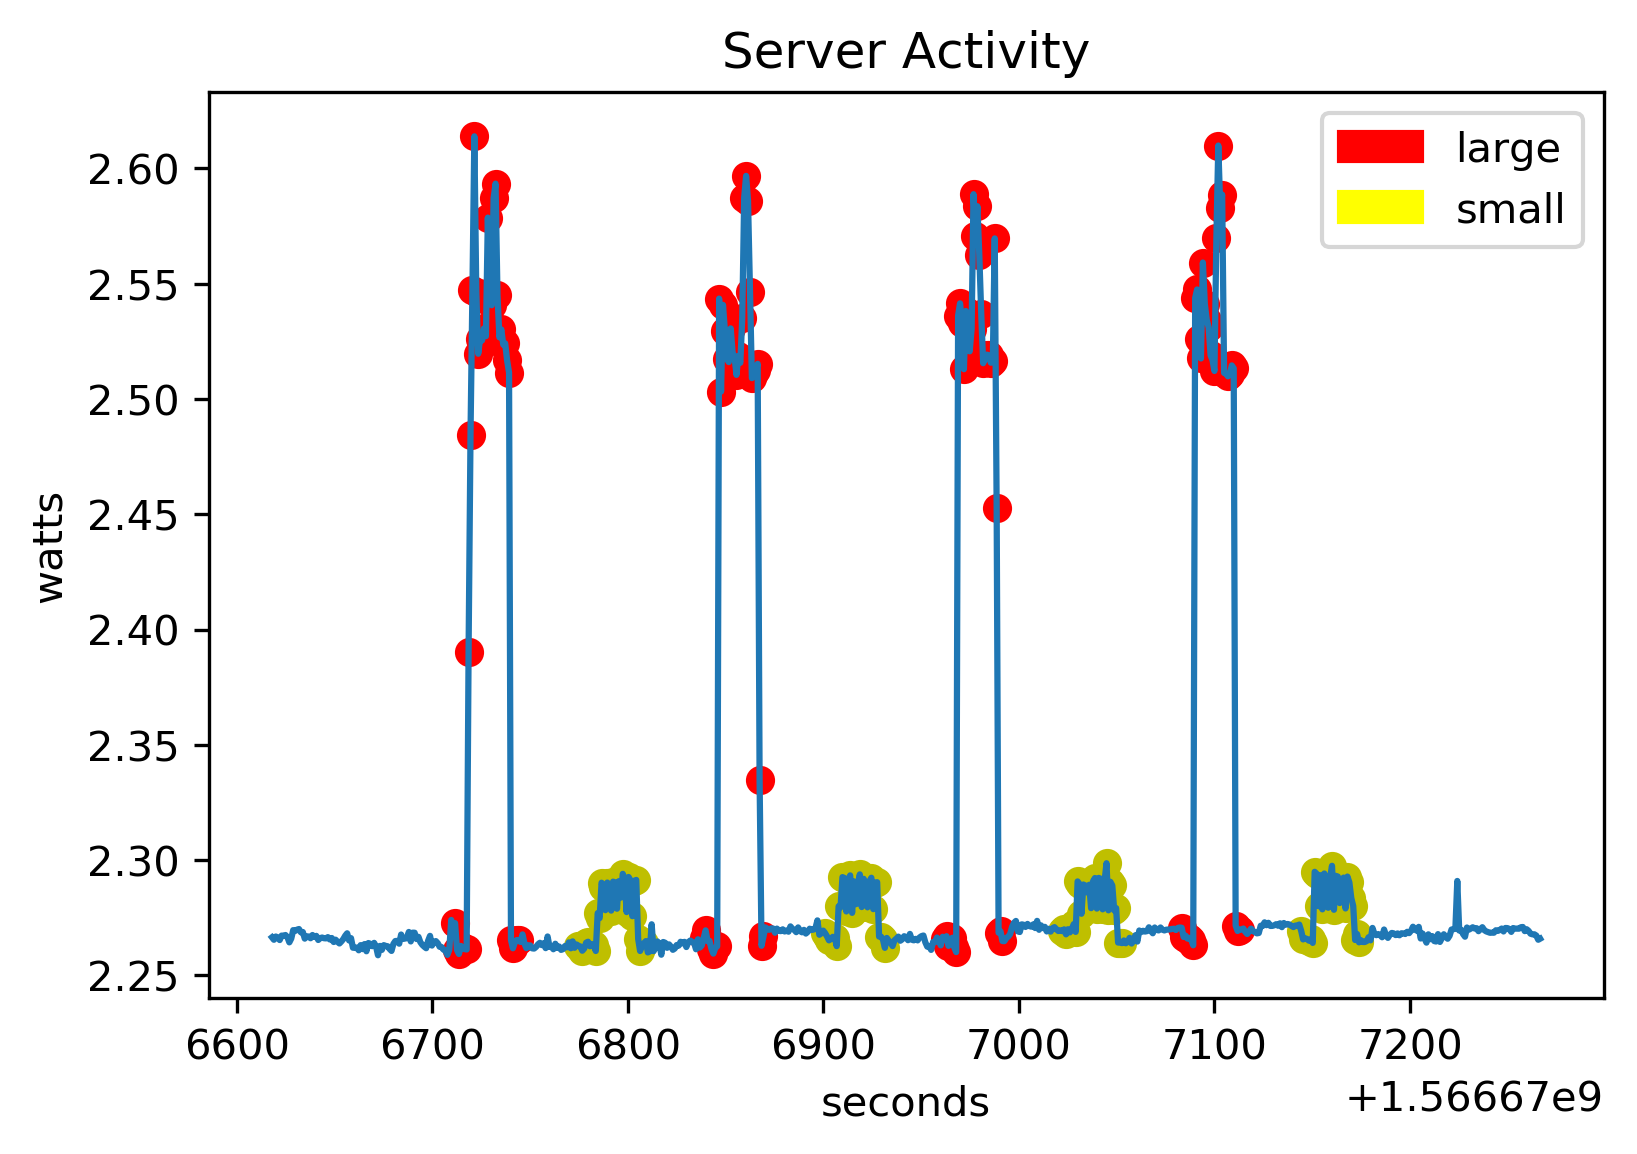

In [243]:
fig, ax = plt.subplots(dpi=300)

x = averagedINA.loc[:,'time']
y = averagedINA.loc[:,'watts']
ax.plot(x,y)

ax.set(xlabel='seconds', ylabel='watts',
       title='Server Activity')

colors = ['r','y','b','g']
for plotNum in list(range(len(dataFrameSplits))):
    ax.scatter(x=dataFrameSplits[plotNum].loc[:,'time'], y=dataFrameSplits[plotNum].loc[:,'watts'], color=colors[plotNum%2])

redLabel = mpatches.Patch(color='red', label='large')
blueLabel = mpatches.Patch(color='blue', label='large image')
yellowLabel = mpatches.Patch(color='yellow', label='small')
greenLabel = mpatches.Patch(color='green', label='small image')

plt.legend(handles=[redLabel, yellowLabel])

#ax.grid()
pngName1 = testDirectoryPath +"watts_"+str(datetime.date.today())+"-"+str(int(time.time()))+".png"
print(pngName1)
fig.savefig(pngName1)
plt.show()

In [244]:
overlayData = dataFrameSplits
overlayData[2]

,mA,V,watts,time
224,499.146667,4.54,2.266126,1.566677e+09
225,499.886667,4.54,2.269485,1.566677e+09
226,498.866667,4.54,2.264855,1.566677e+09
227,498.880000,4.54,2.264915,1.566677e+09
228,498.140000,4.54,2.261556,1.566677e+09
229,497.666667,4.54,2.259407,1.566677e+09
230,498.200000,4.54,2.261828,1.566677e+09
231,498.360000,4.54,2.262554,1.566677e+09
232,560.253333,4.54,2.543550,1.566677e+09
233,551.366667,4.54,2.503205,1.566677e+09


In [245]:
list(range(len(dataFrameSplits)))

[0, 1, 2, 3, 4, 5, 6, 7]

In [246]:
overlayData[0]

,mA,V,watts,time
95,500.573333,4.54,2.272603,1.566677e+09
96,498.013333,4.54,2.260981,1.566677e+09
97,497.626667,4.54,2.259225,1.566677e+09
98,498.400000,4.54,2.262736,1.566677e+09
99,498.166667,4.54,2.261677,1.566677e+09
100,498.093333,4.54,2.261344,1.566677e+09
101,498.060000,4.54,2.261192,1.566677e+09
102,526.466667,4.54,2.390159,1.566677e+09
103,547.186667,4.54,2.484227,1.566677e+09
104,561.060000,4.54,2.547212,1.566677e+09


In [247]:
for overlays in list(range(len(dataFrameSplits))):
    overlayData[overlays].insert(4, 'scaled', overlayData[overlays].time - overlayData[overlays].time[overlayData[overlays].time.index[0]], True)

#overlayData

C:/Users/Alex/Documents/solarserver/aggregator/smallimageVSlargeimage_pingpongtest_August24/aggregator_overlay-2020-01-14-1578979189.png


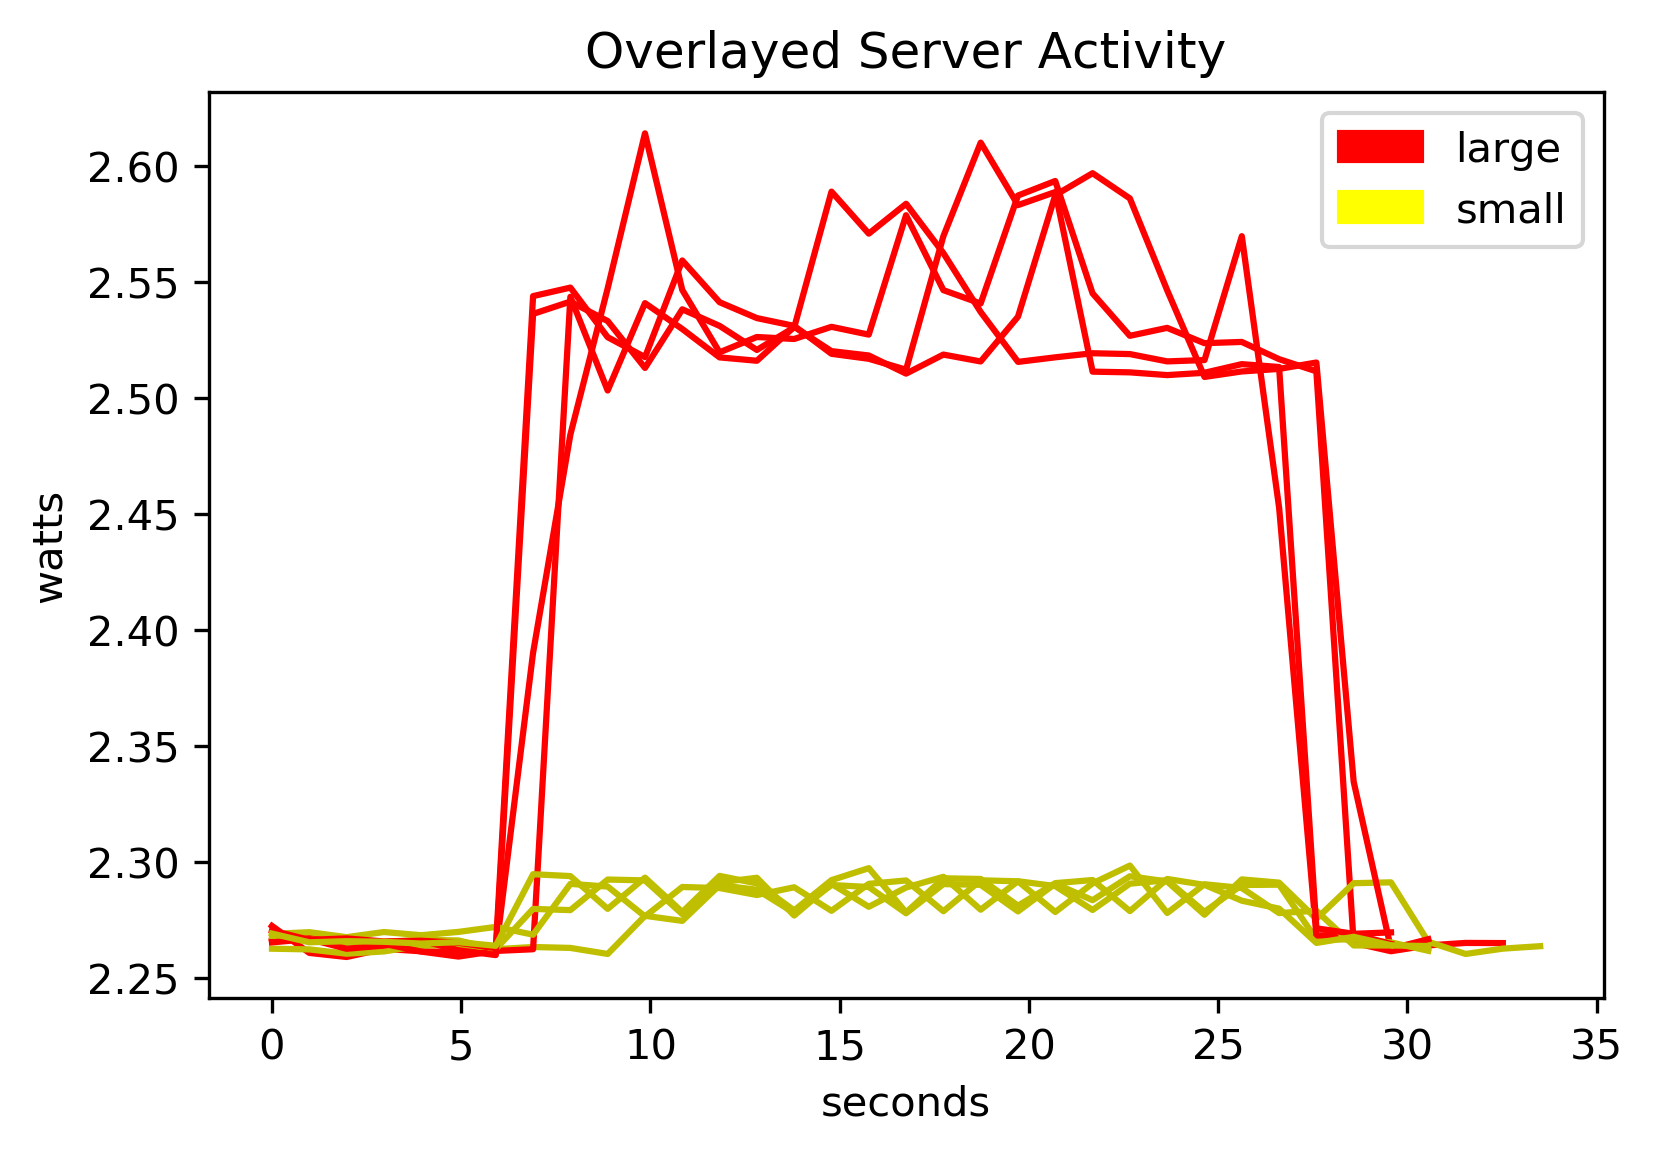

In [248]:
fig, ax = plt.subplots(dpi=300)
'''
x = overlayD1.loc[:,'scaled']
y = overlayD1.loc[:,'watts']
ax.plot(x,y, color='r')

ax.set(xlabel='time', ylabel='watts',
       title='Overlayed Server Activity')

'''

colors = ['r','y','b','g']
for plotNum in list(range(len(overlayData))):
    ax.plot(overlayData[plotNum].loc[:,'scaled'], overlayData[plotNum].loc[:,'watts'], color=colors[plotNum%2])

ax.set(xlabel='seconds', ylabel='watts',
       title='Overlayed Server Activity')

redLabel = mpatches.Patch(color='red', label='large')
blueLabel = mpatches.Patch(color='blue', label='large image')
yellowLabel = mpatches.Patch(color='yellow', label='small')
greenLabel = mpatches.Patch(color='green', label='small image')

plt.legend(handles=[redLabel, yellowLabel])

#ax.grid()
pngName2 = testDirectoryPath +"aggregator_overlay-"+str(datetime.date.today())+"-"+str(int(time.time()))+".png"
print(pngName2)
fig.savefig(pngName2)
plt.show()

In [249]:
#averages
averagedData = dataFrameSplits

In [250]:
averagedData[0].shape[0]

34

In [251]:
#find the shortest length of the data sets
dataLengths = []

for mins in list(range(len(overlayData))):
    dataLengths.append(averagedData[mins].shape[0])
minData = min(dataLengths)

minData

31

In [252]:
averagedData[2].watts.loc[averagedData[2].index[6]]

2.2618280000000004

In [253]:
averagedData[0].head()

,mA,V,watts,time,scaled
95,500.573333,4.54,2.272603,1.566677e+09,0.000000
96,498.013333,4.54,2.260981,1.566677e+09,0.985706
97,497.626667,4.54,2.259225,1.566677e+09,1.971071
98,498.400000,4.54,2.262736,1.566677e+09,2.955934
99,498.166667,4.54,2.261677,1.566677e+09,3.941460


In [254]:
newAveragedDataL = []
newAveragedDataS = []

#loop through all data points
for sumum in list(range(minData)):
    #add up that data point for each set
    summedUp = []
    for getVal in list(range(int(len(averagedData)/2))):
        summedUp.append(averagedData[(getVal*2)].watts.loc[averagedData[(getVal*2)].index[sumum]])
    newAveragedDataL.append(np.mean(summedUp))
    
    summedUp = []
    for getVal in list(range(int(len(averagedData)/2))):
        summedUp.append(averagedData[(getVal*2)+1].watts.loc[averagedData[(getVal*2)+1].index[sumum]])
    newAveragedDataS.append(np.mean(summedUp))
    
print(newAveragedDataL)
print(newAveragedDataS)
    

[2.2687136666666667, 2.2660048, 2.2635153666666668, 2.2644309333333332, 2.2639315333333334, 2.262055, 2.2615177666666666, 2.4331903, 2.5291961666666674, 2.5274180000000004, 2.5463195333333335, 2.5433912333333333, 2.527334766666667, 2.5243232333333334, 2.5293550666666667, 2.539660866666667, 2.533289733333334, 2.5462363000000003, 2.5492781, 2.5508292666666668, 2.5551801000000003, 2.5717284000000005, 2.5431037000000005, 2.535642966666667, 2.5255263333333335, 2.5149405666666667, 2.5299377000000005, 2.498785733333334, 2.3916871333333334, 2.2845733999999998, 2.2647941333333335]
[2.267381933333333, 2.2662015333333336, 2.2649000666666668, 2.2657778, 2.2661031666666664, 2.2666328333333334, 2.2653616333333337, 2.2767872999999996, 2.2818267, 2.2806538666666665, 2.284815533333333, 2.2801090666666672, 2.291148833333333, 2.2895825333333333, 2.2809641000000003, 2.288099466666667, 2.289605233333334, 2.2844523333333333, 2.2891058333333336, 2.2887426333333334, 2.285965666666667, 2.287554666666667, 2.286

In [258]:
# make a new data frame


someAveragedData = {'large' : newAveragedDataL ,'small' : newAveragedDataS , 'time': averagedData[4].loc[:,'scaled']}

averagedDF = pd.DataFrame(someAveragedData)


#get subsection
averagedDF = averagedDF.loc[(averagedDF.loc[:,'time']>= 7)  & (averagedDF.loc[:,'time'] <= 27)]

avgLarge = np.mean(averagedDF.large)
avgSmall = np.mean(averagedDF.small)

print("Average power draw of large image: " + str(avgLarge))
print("Average power draw of small image: " + str(avgSmall))

# Declare a list that is to be converted into a column 

averagedDF = averagedDF.assign(largeAVG=avgLarge)
averagedDF = averagedDF.assign(smallAVG=avgSmall)

#averagedDF

avgTimeInterval = averagedDF.iloc[-1].time-averagedDF.iloc[0].time
print("Time interval for averages: " + str(avgTimeInterval))

lPower = (avgLarge*1000)/avgTimeInterval
sPower = (avgSmall*1000)/avgTimeInterval
print("Large energy = " + str(lPower) + " milliwatt-seconds")
print("Small energy = " + str(sPower) + " milliwatt-seconds")
print("Large energy = " + str(lPower/3600) + " milliwatt-hours")
print("Small energy = " + str(sPower/3600) + " milliwatt-hours")

Average power draw of large image: 2.536073888333333
Average power draw of small image: 2.2863300016666672
Time interval for averages: 18.72633695602417
Large energy = 135.4281883471872 milliwatt-seconds
Small energy = 122.0916833353875 milliwatt-seconds
Large energy = 0.037618941207552 milliwatt-hours
Small energy = 0.033914356482052085 milliwatt-hours


C:/Users/Alex/Documents/solarserver/aggregator/smallimageVSlargeimage_pingpongtest_August24/aggregator_averaged-2020-01-14-1578979398.png


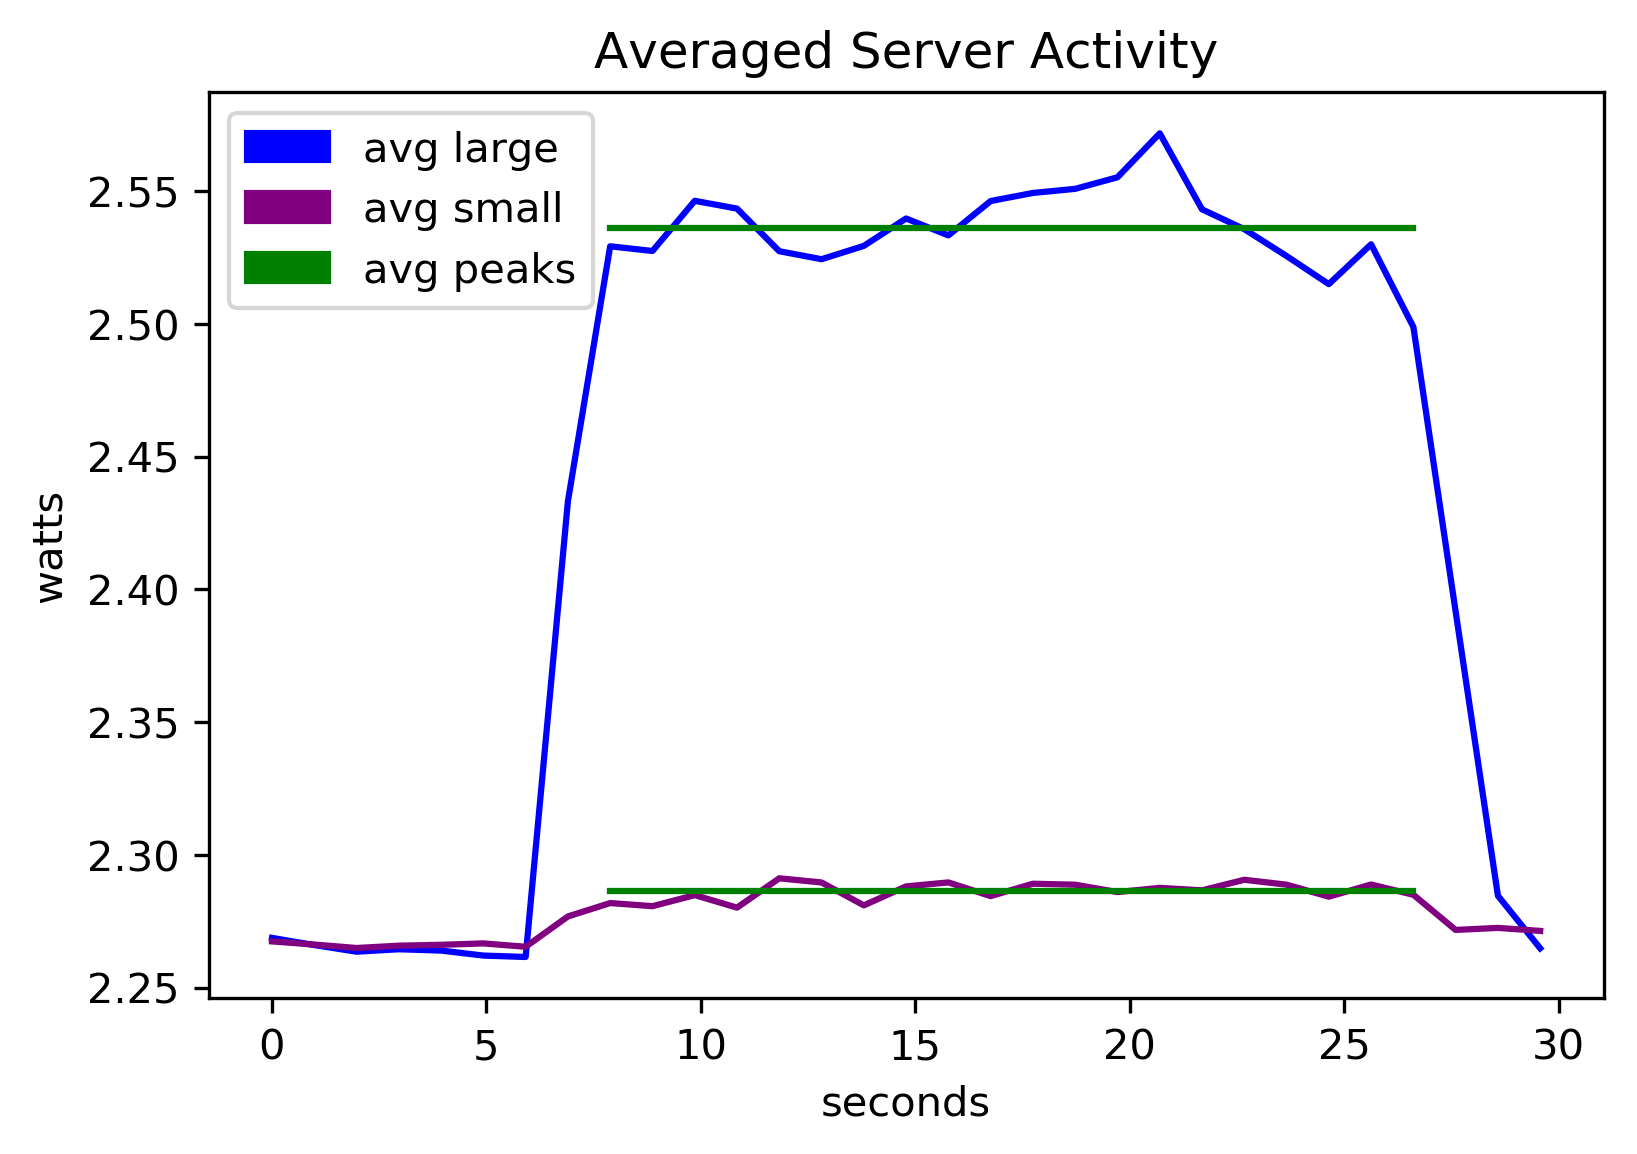

In [259]:
fig, ax = plt.subplots(dpi=300)


plt.plot(averagedData[4].loc[:,'scaled'], newAveragedDataL, color='b')
plt.plot(averagedData[4].loc[:,'scaled'], newAveragedDataS, color='purple')

plt.plot(averagedDF.loc[:,'time'], averagedDF.loc[:,'smallAVG'], color='g')
plt.plot(averagedDF.loc[:,'time'], averagedDF.loc[:,'largeAVG'], color='g')

ax.set(xlabel='seconds', ylabel='watts',
       title='Averaged Server Activity')


blueLabel = mpatches.Patch(color='blue', label='avg large')
greenLabel = mpatches.Patch(color='g', label='avg peaks')
yellowLabel = mpatches.Patch(color='purple', label='avg small')

plt.legend(handles=[blueLabel, yellowLabel, greenLabel])

#ax.grid()
pngName3 = testDirectoryPath +"aggregator_averaged-"+str(datetime.date.today())+"-"+str(int(time.time()))+".png"
print(pngName3)
fig.savefig(pngName3)
plt.show()


C:/Users/Alex/Documents/solarserver/aggregator/smallimageVSlargeimage_pingpongtest_August24/aggregator_overlay-2020-01-14-1578979192.png


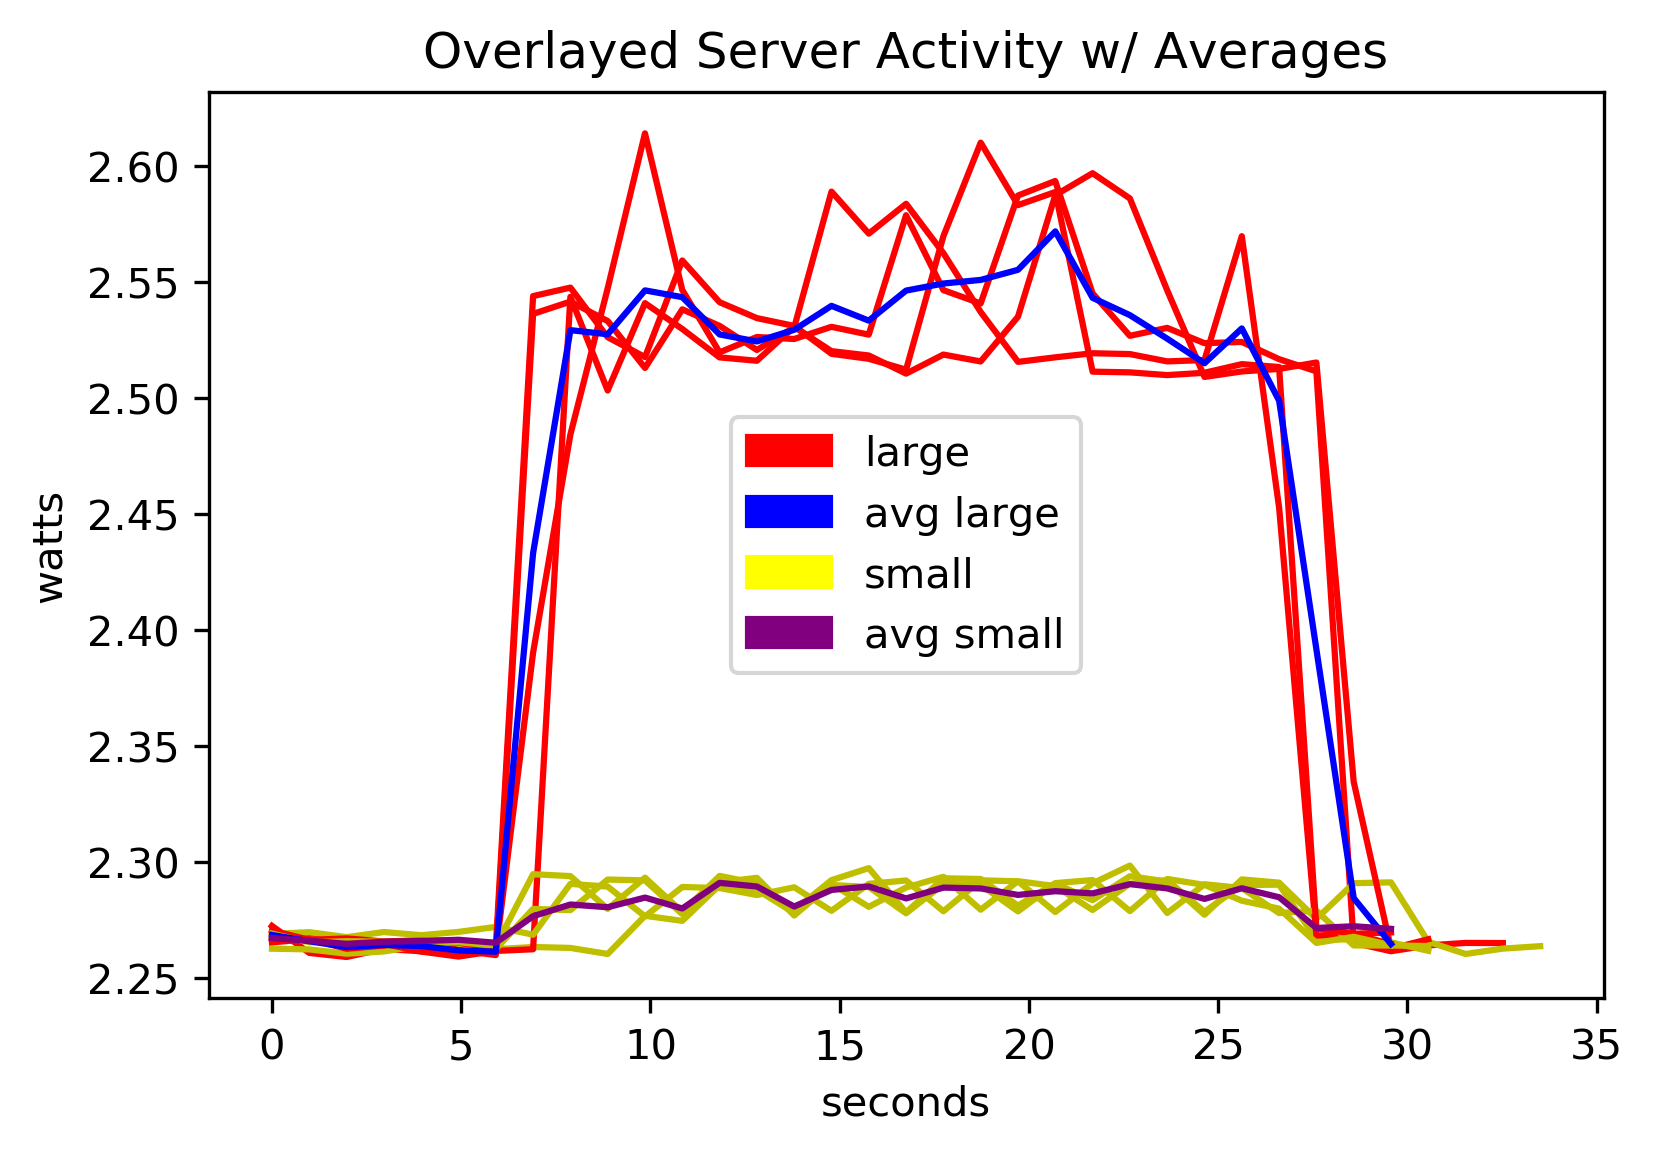

In [257]:
fig, ax = plt.subplots(dpi=300)

colors = ['r','y']
for plotNum in list(range(len(overlayData))):
    ax.plot(overlayData[plotNum].loc[:,'scaled'], overlayData[plotNum].loc[:,'watts'], color=colors[plotNum%2])

    
ax.plot(averagedData[4].loc[:,'scaled'], newAveragedDataL, color='b')
ax.plot(averagedData[4].loc[:,'scaled'], newAveragedDataS, color='purple')

ax.set(xlabel='seconds', ylabel='watts',
       title='Overlayed Server Activity w/ Averages')

#ax.scatter(x=overlayD1.loc[:,'scaled'], y=overlayD1.loc[:,'watts'], color='r')
#ax.plot(overlayS1.loc[:,'scaled'], overlayS1.loc[:,'watts'], color='y')

redLabel = mpatches.Patch(color='red', label='large')
blueLabel = mpatches.Patch(color='b', label='avg large')
yellowLabel = mpatches.Patch(color='yellow', label='small')
purpleLabel = mpatches.Patch(color='purple', label='avg small')

plt.legend(handles=[redLabel, blueLabel, yellowLabel, purpleLabel])

#ax.grid()
pngName2 = testDirectoryPath +"aggregator_overlay-"+str(datetime.date.today())+"-"+str(int(time.time()))+".png"
print(pngName2)
fig.savefig(pngName2)
plt.show()